# Financial EDA & Forecasting System


### This notebook analyzes U.S. macroeconomic data, specifically the Consumer Price Index (CPI), and forecasts future CPI values using an ARIMA time series model.

Data Source: [FRED CPI Data](https://fred.stlouisfed.org/series/CPIAUCSL)

## Step 1: Install Required Packages

👩‍💻 Option A — If you're using Jupyter Notebook / Colab:

In [5]:
# Install dependencies using shell commands inside the notebook
!pip install numpy==1.26.4 pandas==2.2.2 --force-reinstall --no-cache-dir
!pip install pmdarima
!pip install pandas_datareader
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 1.3 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 2.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.9.0.post0
    Uninstalling python-dateutil-2.9.0.post0:
      Successfully uninstalled python-dateutil-2.9.0.post0
  Attempting uninstall:

🖥️ Option B — If you're using VS Code or Terminal:


In [ ]:
pip install numpy==1.26.4 pandas==2.2.2 --force-reinstall --no-cache-dir
pip install pmdarima
pip install pandas_datareader
pip install matplotlib

## Step 2: Import Required Libraries



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import pandas_datareader.data as web
from pmdarima import auto_arima
import warnings
import sys
import os

## Step 3: User Inputs for Date Range

In [13]:
# Ask user for date range
# Step 3: Input and parse correctly
start_date = pd.to_datetime(input("Enter start date (DD-MM-YYYY): "), dayfirst=True)
end_date = pd.to_datetime(input("Enter end date (DD-MM-YYYY): "), dayfirst=True)

# Step 4: Use parsed datetime objects
df = web.DataReader('CPIAUCSL', 'fred', start_date, end_date)

Enter start date (DD-MM-YYYY):  01-01-2000
Enter end date (DD-MM-YYYY):  30-12-2024


## Step 4: Load U.S. CPI Data from FRED

In [14]:
# Load CPI data from the Federal Reserve Economic Database
df = web.DataReader('CPIAUCSL', 'fred', start_date, end_date)
df.rename(columns={'CPIAUCSL': 'CPI'}, inplace=True)
df.index = pd.to_datetime(df.index)

## Step 5: Calculate Year-over-Year (YoY) Inflation

In [15]:
# Calculate YoY Inflation Rate (in %)
df['YoY_Inflation'] = df['CPI'].pct_change(periods=12) * 100

## Step 6: Fit ARIMA Model to the CPI Data

In [16]:
# Suppress warnings and trace output for clean output
warnings.filterwarnings("ignore")
sys.stdout = open(os.devnull, 'w')  # Disable printing to keep output clean

# Fit ARIMA model to CPI
model = auto_arima(df['CPI'],
                   seasonal=False,
                   stepwise=True,
                   suppress_warnings=True,
                   trace=False)

sys.stdout = sys.__stdout__  # Restore standard output
print(f"Best ARIMA model:\n{model.summary()}")

Best ARIMA model:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -275.361
Date:                Tue, 20 May 2025   AIC                            556.723
Time:                        21:15:25   BIC                            567.814
Sample:                    01-01-2000   HQIC                           561.163
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4359      0.032    -13.827      0.000      -0.498      -0.374
ma.L2         -0.4625      0.034    -13.669      0.000      -0.529      -0.396
sigma2         0.3697      0.019  

## Step 7: Forecast Future CPI Values

In [17]:
# Ask how many months to forecast
forecast_period = int(input("Enter forecast period in months: "))

# Predict future CPI
forecast = model.predict(n_periods=forecast_period)

# Generate future dates for forecast
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1),
                               periods=forecast_period, freq='MS')

# Create Series with forecast values
forecast_series = pd.Series(forecast, index=forecast_index)

Enter forecast period in months:  80


## Step 8: Visualize YoY Inflation and Forecasted CPI

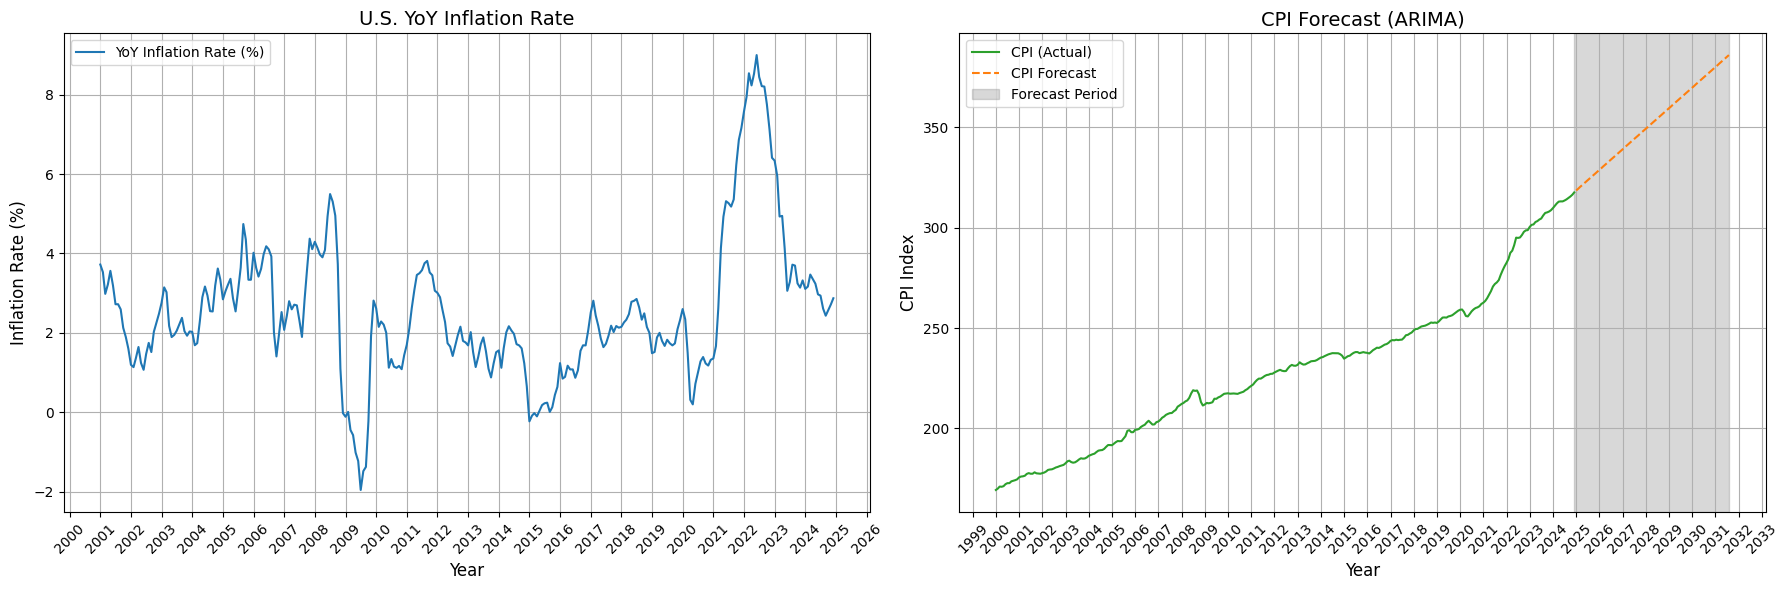

In [18]:
# Set up side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# --- Plot 1: YoY Inflation ---
ax1.plot(df.index, df['YoY_Inflation'], color='tab:blue', label='YoY Inflation Rate (%)')
ax1.set_title('U.S. YoY Inflation Rate', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Inflation Rate (%)', fontsize=12)
ax1.grid(True)
ax1.legend()
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.tick_params(axis='x', rotation=45)

# --- Plot 2: CPI Forecast ---
ax2.plot(df.index, df['CPI'], label='CPI (Actual)', color='tab:green')
ax2.plot(forecast_series.index, forecast_series, label='CPI Forecast', color='tab:orange', linestyle='--')
ax2.axvspan(df.index[-1], forecast_series.index[-1], color='gray', alpha=0.3, label="Forecast Period")
ax2.set_title('CPI Forecast (ARIMA)', fontsize=14)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('CPI Index', fontsize=12)
ax2.grid(True)
ax2.legend()
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()